<a href="https://colab.research.google.com/github/usnuni/python_basic/blob/main/ai1011hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import pandas as pd


In [22]:
import os
cp = os.getcwd()
print(cp)

/content


In [23]:

# Data Loading
path = '/content/'


In [25]:
data = pd.read_csv(path+'Admission.csv')

In [26]:
# Simple EDA
data.shape
data.head()


,GRE Score,TOEFL Score,CGPA,University Rating,Chance of Admit
0,337,118,9.65,4,0.92
1,324,107,8.87,4,0.76
2,316,104,8.00,3,0.72
3,322,110,8.67,3,0.80
4,314,103,8.21,2,0.65


In [27]:
# Separation of features and target
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]


In [28]:

x


,GRE Score,TOEFL Score,CGPA,University Rating
0,337,118,9.65,4
1,324,107,8.87,4
2,316,104,8.00,3
3,322,110,8.67,3
4,314,103,8.21,2
...,...,...,...,...
495,332,108,9.02,5
496,337,117,9.87,5
497,330,120,9.56,5
498,312,103,8.43,4


In [ ]:

y


In [29]:

# Separation of train set and test set
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=108)
train_x.shape,train_y.shape,test_x.shape,test_y.shape


((400, 4), (400,), (100, 4), (100,))

In [30]:

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [31]:

# model define

model = Sequential()
    
model.add(Dense(4,activation='relu',input_dim=4))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear')) #as this is Regression problem

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [32]:

# hyperparameter setting
model.compile(loss='mean_squared_error',optimizer='Adam') #as this is Regression problem

# train
hist = model.fit(train_x,train_y,epochs=100,validation_split=0.2)



Epoch 1/100
10/10 [==============================] - 1s 41ms/step - loss: 2102.4209 - val_loss: 1833.2346
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1655.3435 - val_loss: 1444.6315
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 1306.9561 - val_loss: 1144.5925
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 1040.2012 - val_loss: 915.5151
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 836.1415 - val_loss: 740.7490
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 679.5032 - val_loss: 606.1911
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 558.4881 - val_loss: 500.7405
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 463.0266 - val_loss: 416.9317
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 386.4851 - val_loss: 349.4564
Epoch 10/100
10/10 [==============================] - 0s 5ms/step

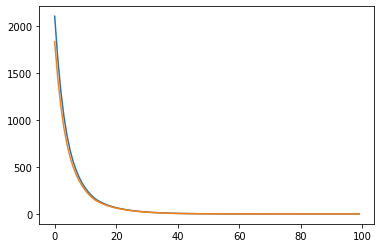

[[0.5792581]]


In [33]:

import matplotlib.pyplot as plt

#plotting training and validation loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

# inference
y_pred = model.predict([[320,120,9.5,4]])

print(y_pred)
